<a href="https://colab.research.google.com/github/leandro-svg/ComputerVision/blob/master/tqg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("osmi/mental-health-in-tech-survey")

print("Path to dataset files:", path)

Path to dataset files: /root/.cache/kagglehub/datasets/osmi/mental-health-in-tech-survey/versions/3


In [ ]:
import warnings
warnings.filterwarnings('ignore')

#basic libraries

import numpy as np
import pandas as pd

#visualization libraries

import missingno as msno
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
%matplotlib inline

In [ ]:
df = pd.read_csv("/root/.cache/kagglehub/datasets/osmi/mental-health-in-tech-survey/versions/3/survey.csv")



In [ ]:
df.head()

,Timestamp,Age,Gender,Country,state,self_employed,family_history,treatment,work_interfere,no_employees,...,leave,mental_health_consequence,phys_health_consequence,coworkers,supervisor,mental_health_interview,phys_health_interview,mental_vs_physical,obs_consequence,comments
0,2014-08-27 11:29:31,37,Female,United States,IL,NaN,No,Yes,Often,6-25,...,Somewhat easy,No,No,Some of them,Yes,No,Maybe,Yes,No,NaN
1,2014-08-27 11:29:37,44,M,United States,IN,NaN,No,No,Rarely,More than 1000,...,Don't know,Maybe,No,No,No,No,No,Don't know,No,NaN
2,2014-08-27 11:29:44,32,Male,Canada,NaN,NaN,No,No,Rarely,6-25,...,Somewhat difficult,No,No,Yes,Yes,Yes,Yes,No,No,NaN
3,2014-08-27 11:29:46,31,Male,United Kingdom,NaN,NaN,Yes,Yes,Often,26-100,...,Somewhat difficult,Yes,Yes,Some of them,No,Maybe,Maybe,No,Yes,NaN
4,2014-08-27 11:30:22,31,Male,United States,TX,NaN,No,No,Never,100-500,...,Don't know,No,No,Some of them,Yes,Yes,Yes,Don't know,No,NaN


In [ ]:
print(df['Country'].value_counts())
print("\n \n")
print(df['state'].unique())

####################################################### Unbalanced dataset ########################################################
# Could be a problem for the model, since it could be biased to the majority class.
# Solution: probably use SMOTE to balance the dataset
# Or prune the dataset to have only the most common countries and states or remove the unbalanced columns


Country
United States             751
United Kingdom            185
Canada                     72
Germany                    45
Ireland                    27
Netherlands                27
Australia                  21
France                     13
India                      10
New Zealand                 8
Poland                      7
Switzerland                 7
Sweden                      7
Italy                       7
South Africa                6
Belgium                     6
Brazil                      6
Israel                      5
Singapore                   4
Bulgaria                    4
Austria                     3
Finland                     3
Mexico                      3
Russia                      3
Denmark                     2
Greece                      2
Colombia                    2
Croatia                     2
Portugal                    2
Moldova                     1
Georgia                     1
Bahamas, The                1
China                       1
Th

In [ ]:
## GARDER

# Problem with gender typing, should be fixed
# Prune the dataset to have only the most common
print(df['Gender'].value_counts())

df['Gender'].replace(['Male ', 'male', 'M', 'm', 'Male', 'Cis Male',
                     'Man', 'cis male', 'Mail', 'Male-ish', 'Male (CIS)',
                      'Cis Man', 'msle', 'Malr', 'Mal', 'maile', 'Make',], 'Male', inplace = True)

df['Gender'].replace(['Female ', 'female', 'F', 'f', 'Woman', 'Female',
                     'femail', 'Cis Female', 'cis-female/femme', 'Femake', 'Female (cis)',
                     'woman',], 'Female', inplace = True)

df["Gender"].replace(['Female (trans)', 'queer/she/they', 'non-binary',
                     'fluid', 'queer', 'Androgyne', 'Trans-female', 'male leaning androgynous',
                      'Agender', 'A little about you', 'Nah', 'All',
                      'ostensibly male, unsure what that really means',
                      'Genderqueer', 'Enby', 'p', 'Neuter', 'something kinda male?',
                      'Guy (-ish) ^_^', 'Trans woman',], 'Other', inplace = True)

df['Gender'].value_counts()
print(df['Gender'].value_counts())


df['work_interfere'] = df['work_interfere'].fillna('Don\'t know' )
print(df['work_interfere'].unique())
df['self_employed'] = df['self_employed'].fillna('No')
print(df['self_employed'].unique())


# More males than females, unbalanced
# Solution: ?????



Gender
Male                                              615
male                                              206
Female                                            121
M                                                 116
female                                             62
F                                                  38
m                                                  34
f                                                  15
Make                                                4
Male                                                3
Woman                                               3
Cis Male                                            2
Man                                                 2
Female (trans)                                      2
Female                                              2
Trans woman                                         1
msle                                                1
male leaning androgynous                            1
Neuter               

In [ ]:
df.drop(columns=['Timestamp', 'Country', 'state', 'comments'], inplace = True)

In [ ]:
# print(df['comments'].value_counts())
# Too many NaN values, should be removed
# Hard to interpret
# Could be used to help the interpretation of the prediction and inference


In [ ]:
df.drop(df[df['Age'] < 0].index, inplace = True)
df.drop(df[df['Age'] > 100].index, inplace = True)
df['Age'].unique()
print(df['Age'].value_counts())

df.to_csv('/content/sample_data/mental_health_in_tech_survey.csv', index=False)




Age
29    85
32    82
26    75
27    71
33    70
28    68
31    67
34    65
30    63
25    61
35    55
23    51
24    46
37    43
38    39
36    37
40    33
39    33
43    28
22    21
41    21
42    20
21    16
45    12
46    12
44    11
19     9
18     7
50     6
48     6
20     6
51     5
56     4
49     4
54     3
55     3
57     3
47     2
60     2
62     1
58     1
65     1
5      1
53     1
61     1
8      1
11     1
72     1
Name: count, dtype: int64


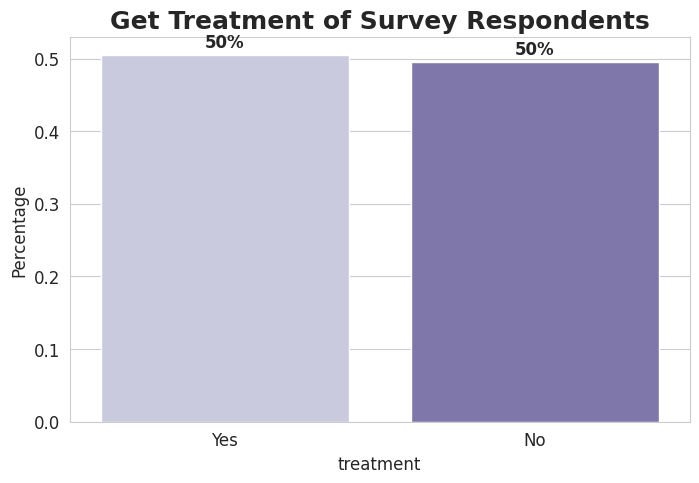

In [ ]:
sns.set_style("whitegrid")
plt.figure(figsize = (8,5))
plt.title('Get Treatment of Survey Respondents', fontsize=18, fontweight='bold')
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')

ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage.head(10), palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

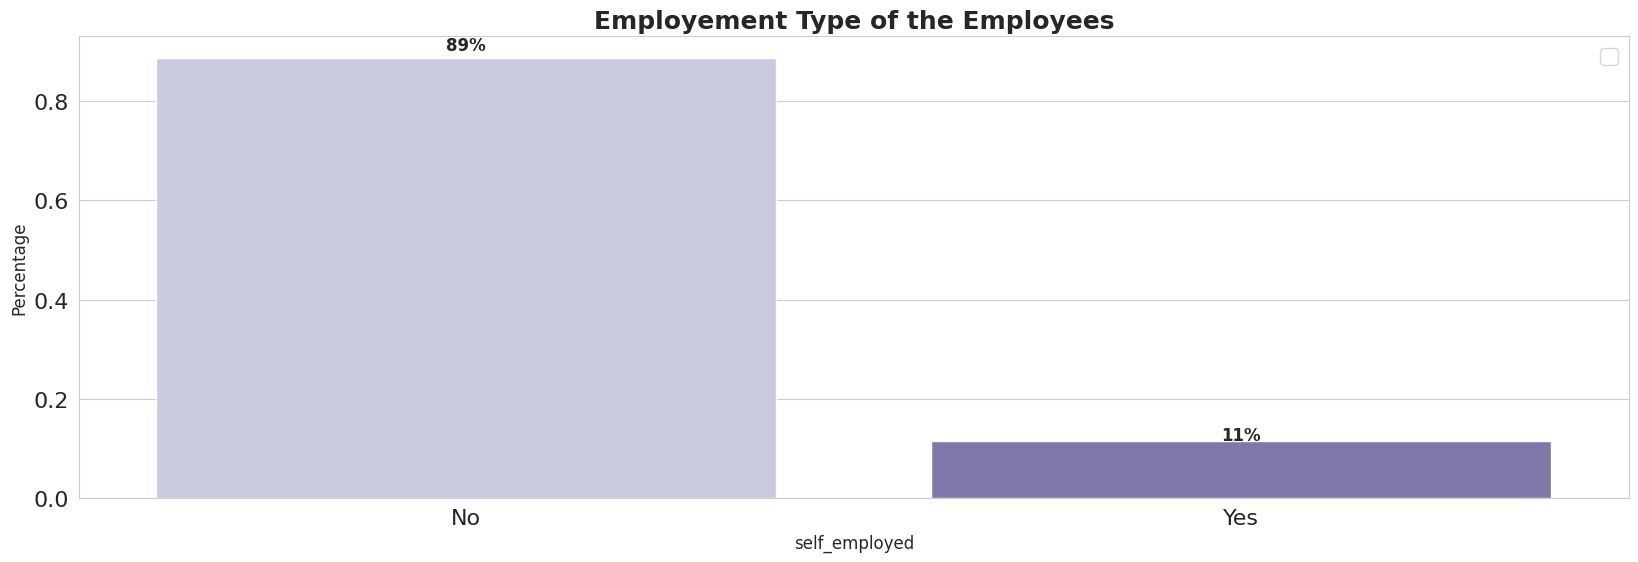

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,1,1)
eda_percentage = df['self_employed'].value_counts(normalize = True).rename_axis('self_employed').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'self_employed', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.show()

treatment
Yes    633
No     621
Name: count, dtype: int64


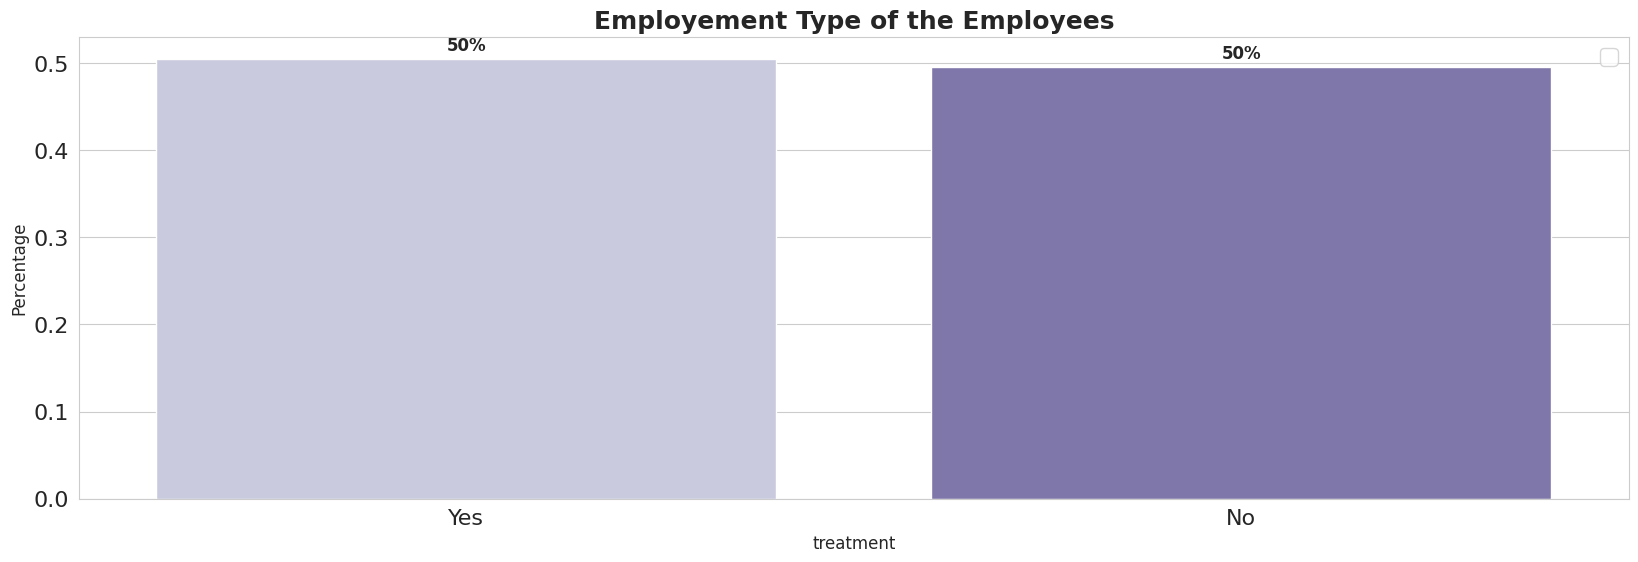

In [ ]:
print(df['treatment'].value_counts())
plt.figure(figsize = (20,6))
plt.subplot(1,1,1)
eda_percentage = df['treatment'].value_counts(normalize = True).rename_axis('treatment').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'treatment', y = 'Percentage', data = eda_percentage, palette = 'Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Employement Type of the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


plt.show()

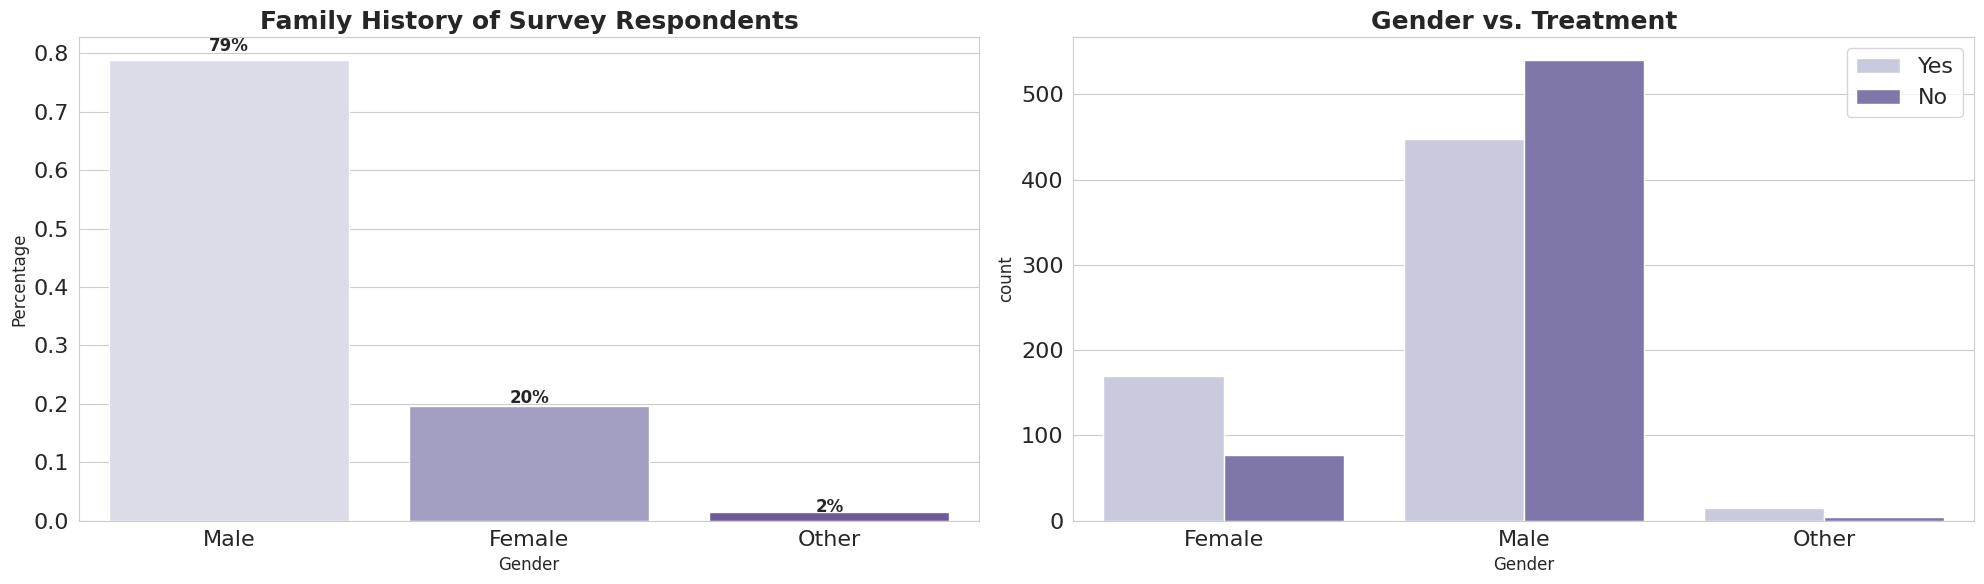

In [ ]:
plt.figure(figsize=(20, 6))

# Bar plot for percentages
plt.subplot(1, 2, 1)
eda_percentage = df['Gender'].value_counts(normalize=True).rename_axis('Gender').reset_index(name='Percentage')
ax = sns.barplot(x='Gender', y='Percentage', data=eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width / 2, y + height * 1.02), ha='center', fontweight='bold')

plt.title('Family History of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)

# Count plot with hue
plt.subplot(1, 2, 2)
sns.countplot(x='Gender', hue='treatment', data=df, palette='Purples')  # Specify x-axis
plt.title('Gender vs. Treatment', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.tight_layout()
plt.show()


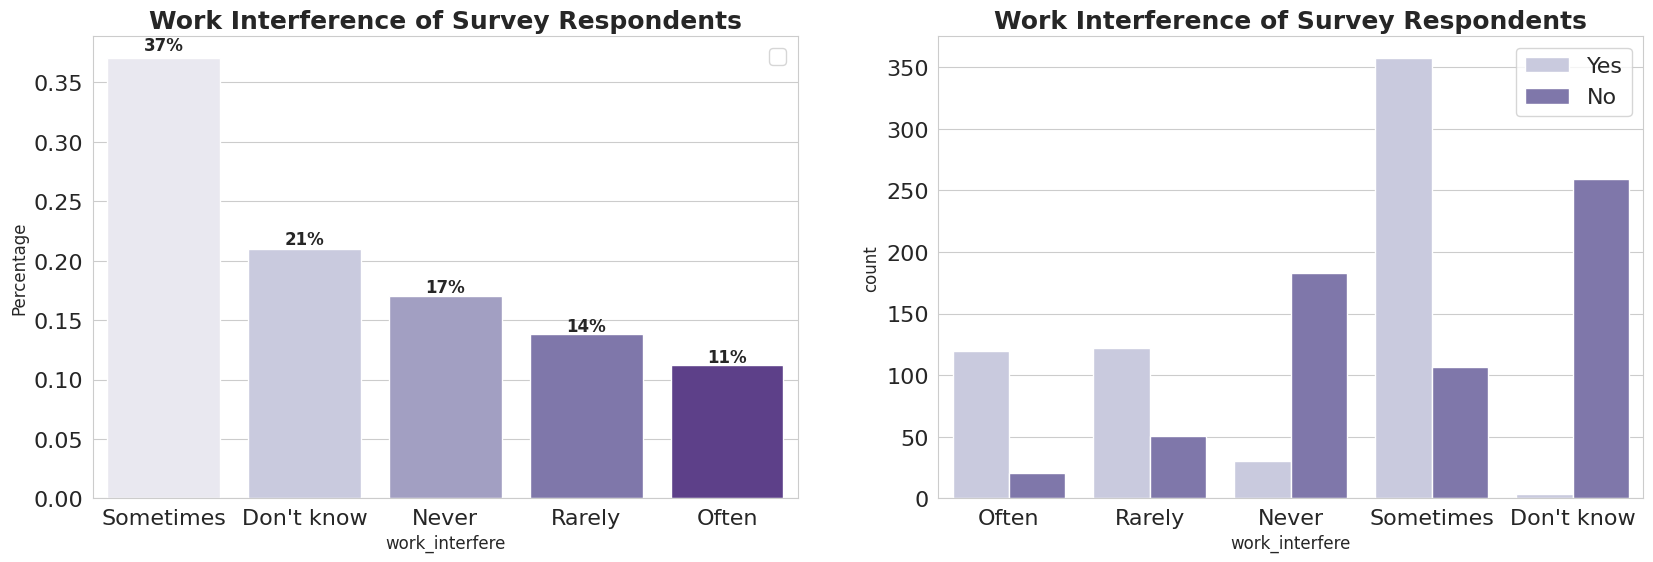

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['work_interfere'].value_counts(normalize = True).rename_axis('work_interfere').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'work_interfere', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['work_interfere'], hue = df['treatment'], palette = 'Purples')
plt.title('Work Interference of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)


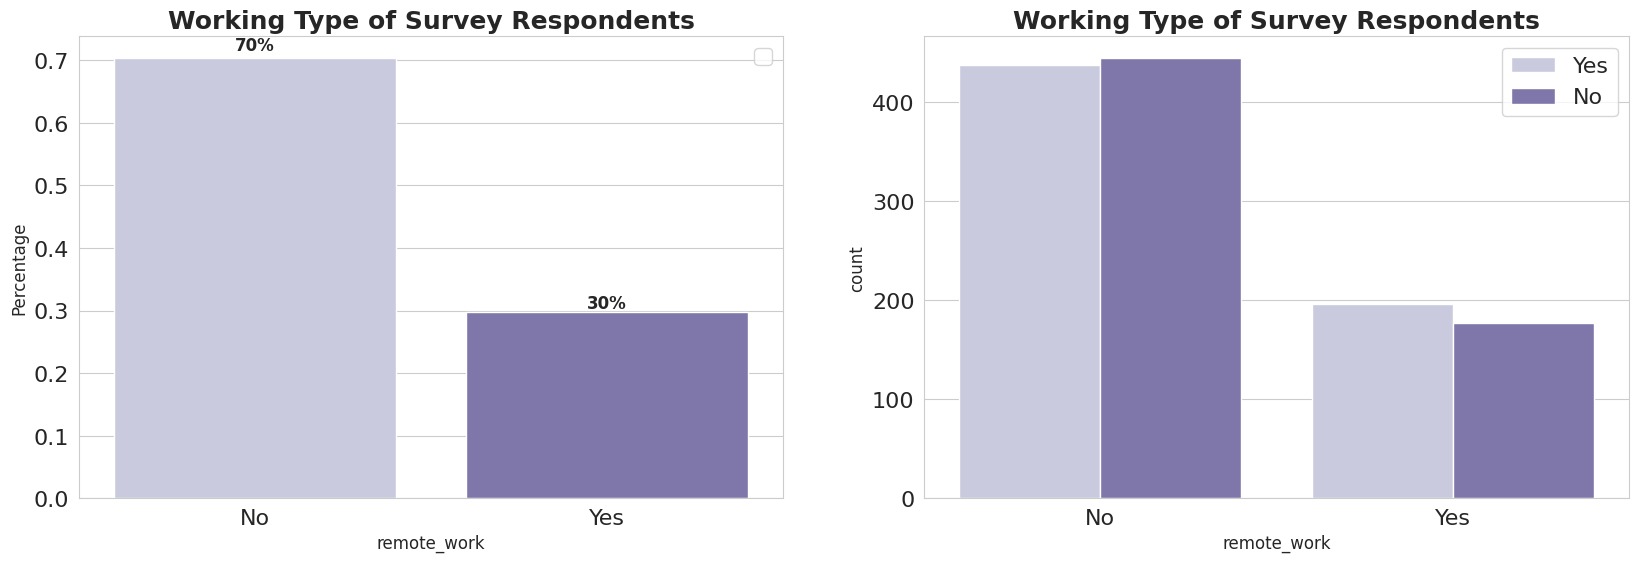

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['remote_work'].value_counts(normalize = True).rename_axis('remote_work').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'remote_work', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['remote_work'], hue = df['treatment'], palette='Purples')
plt.title('Working Type of Survey Respondents', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

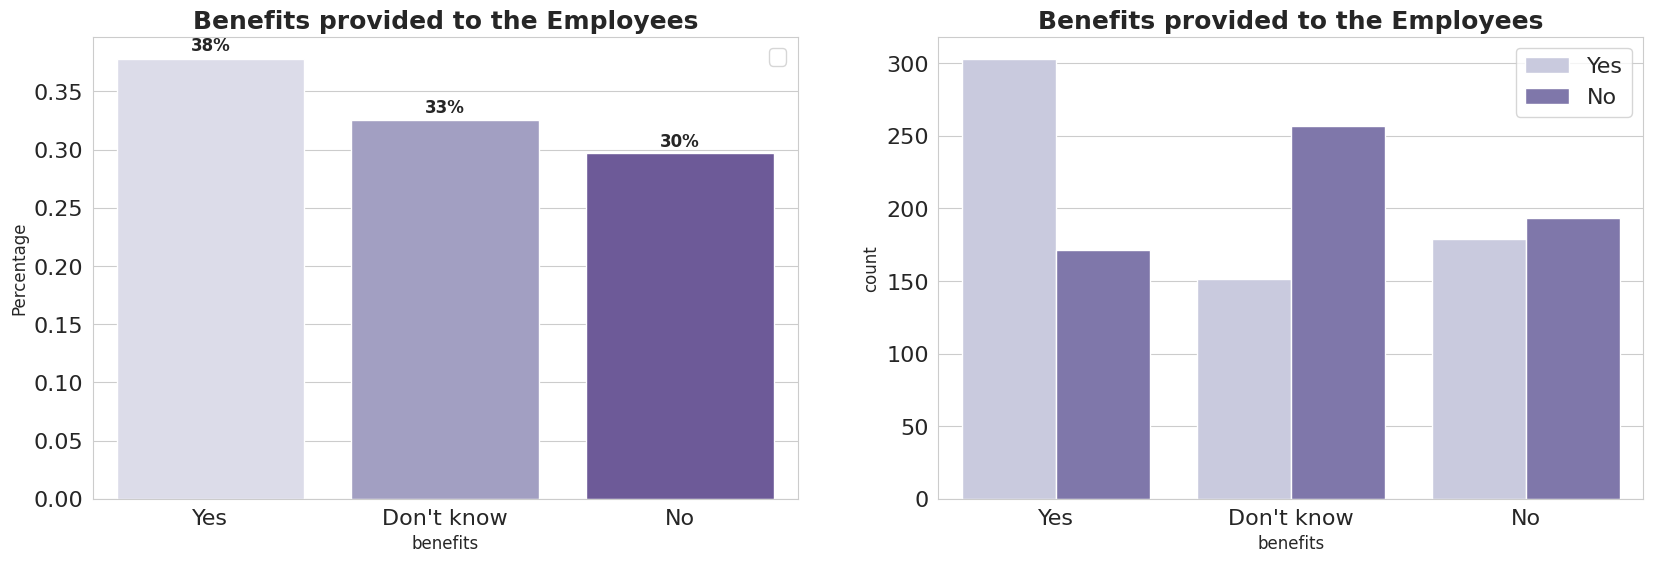

In [ ]:
plt.figure(figsize = (20,6))
plt.subplot(1,2,1)
eda_percentage = df['benefits'].value_counts(normalize = True).rename_axis('benefits').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'benefits', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['benefits'], hue = df['treatment'], palette='Purples')
plt.title('Benefits provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

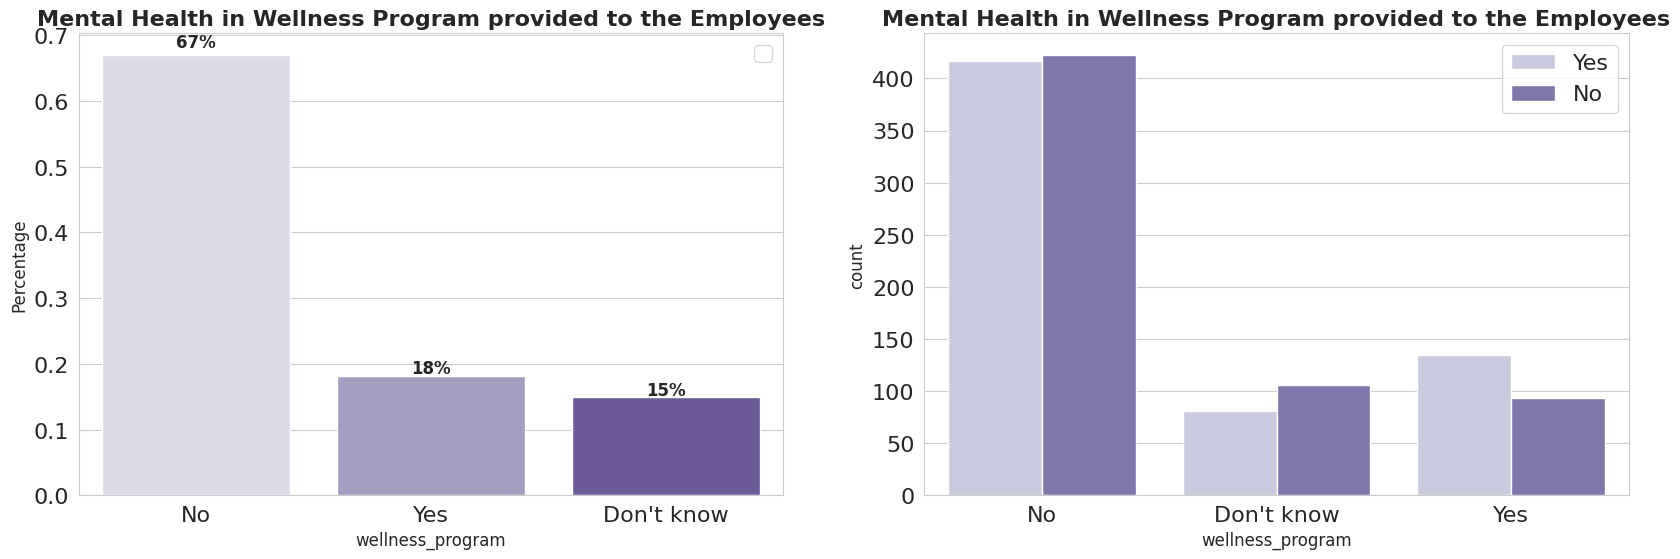

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['wellness_program'].value_counts(normalize = True).rename_axis('wellness_program').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'wellness_program', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['wellness_program'], hue = df['treatment'], palette='Purples')
plt.title('Mental Health in Wellness Program provided to the Employees', fontsize=16, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

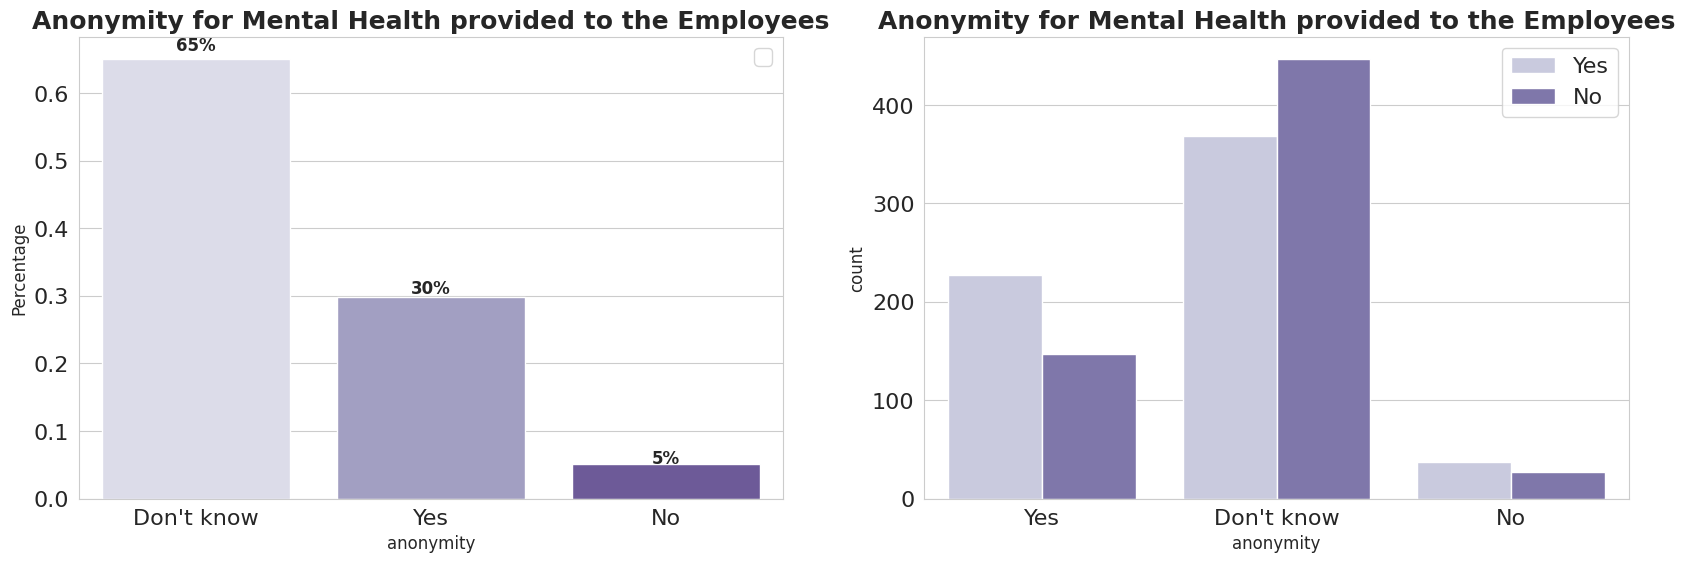

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['anonymity'].value_counts(normalize = True).rename_axis('anonymity').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'anonymity', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['anonymity'], hue = df['treatment'], palette='Purples')
plt.title('Anonymity for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

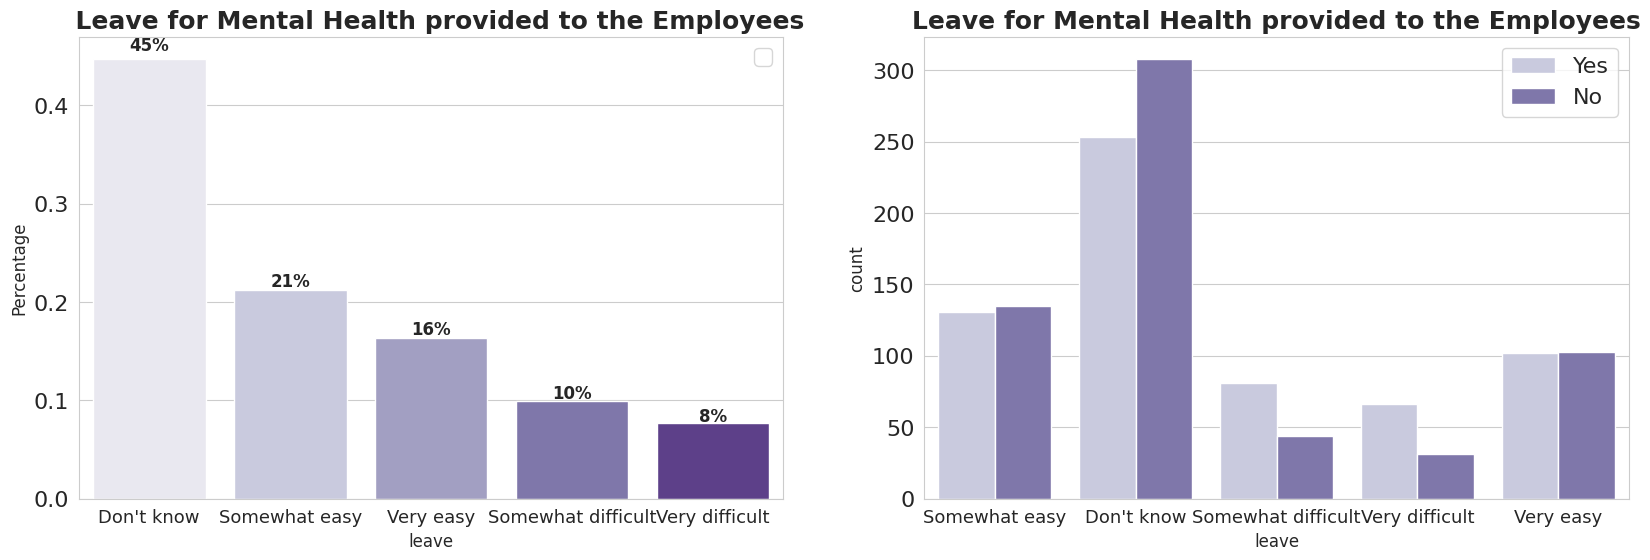

In [ ]:
plt.figure(figsize=(20,6))
plt.subplot(1,2,1)
eda_percentage = df['leave'].value_counts(normalize = True).rename_axis('leave').reset_index(name = 'Percentage')
ax = sns.barplot(x = 'leave', y = 'Percentage', data = eda_percentage, palette='Purples')
for p in ax.patches:
    width = p.get_width()
    height = p.get_height()
    x, y = p.get_xy()
    ax.annotate(f'{height:.0%}', (x + width/2, y + height*1.02), ha='center', fontweight='bold')

plt.title('  Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

plt.subplot(1,2,2)
sns.countplot(x=df['leave'], hue = df['treatment'], palette='Purples')
plt.title('Leave for Mental Health provided to the Employees', fontsize=18, fontweight='bold')
plt.xticks(fontsize=13)
plt.yticks(fontsize=16)
plt.legend(fontsize=16)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1254 entries, 0 to 1258
Data columns (total 23 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   Age                        1254 non-null   int64 
 1   Gender                     1254 non-null   object
 2   self_employed              1254 non-null   object
 3   family_history             1254 non-null   object
 4   treatment                  1254 non-null   object
 5   work_interfere             1254 non-null   object
 6   no_employees               1254 non-null   object
 7   remote_work                1254 non-null   object
 8   tech_company               1254 non-null   object
 9   benefits                   1254 non-null   object
 10  care_options               1254 non-null   object
 11  wellness_program           1254 non-null   object
 12  seek_help                  1254 non-null   object
 13  anonymity                  1254 non-null   object
 14  leave        

In [ ]:
df.columns
list_col=['Age', 'Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']

for col in list_col:
    print('{} :{} ' . format(col.upper(),df[col].unique()))

AGE :[37 44 32 31 33 35 39 42 23 29 36 27 46 41 34 30 40 38 50 24 18 28 26 22
 19 25 45 21 43 56 60 54 55 48 20 57 58 47 62 51 65 49  5 53 61  8 11 72] 
GENDER :['Female' 'Male' 'Other'] 
SELF_EMPLOYED :['No' 'Yes'] 
FAMILY_HISTORY :['No' 'Yes'] 
TREATMENT :['Yes' 'No'] 
WORK_INTERFERE :['Often' 'Rarely' 'Never' 'Sometimes' "Don't know"] 
NO_EMPLOYEES :['6-25' 'More than 1000' '26-100' '100-500' '1-5' '500-1000'] 
REMOTE_WORK :['No' 'Yes'] 
TECH_COMPANY :['Yes' 'No'] 
BENEFITS :['Yes' "Don't know" 'No'] 
CARE_OPTIONS :['Not sure' 'No' 'Yes'] 
WELLNESS_PROGRAM :['No' "Don't know" 'Yes'] 
SEEK_HELP :['Yes' "Don't know" 'No'] 
ANONYMITY :['Yes' "Don't know" 'No'] 
LEAVE :['Somewhat easy' "Don't know" 'Somewhat difficult' 'Very difficult'
 'Very easy'] 
MENTAL_HEALTH_CONSEQUENCE :['No' 'Maybe' 'Yes'] 
PHYS_HEALTH_CONSEQUENCE :['No' 'Yes' 'Maybe'] 
COWORKERS :['Some of them' 'No' 'Yes'] 
SUPERVISOR :['Yes' 'No' 'Some of them'] 
MENTAL_HEALTH_INTERVIEW :['No' 'Yes' 'Maybe'] 
PHYS_HEALTH_INTE

In [ ]:
from sklearn.preprocessing import LabelEncoder
object_cols = ['Gender', 'self_employed', 'family_history', 'treatment',
       'work_interfere', 'no_employees', 'remote_work', 'tech_company',
       'benefits', 'care_options', 'wellness_program', 'seek_help',
       'anonymity', 'leave', 'mental_health_consequence',
       'phys_health_consequence', 'coworkers', 'supervisor',
       'mental_health_interview', 'phys_health_interview',
       'mental_vs_physical', 'obs_consequence']
label_encoder = LabelEncoder()
df_encoded_ml = df.copy()
print(df_encoded_ml)
for col in object_cols:
    label_encoder.fit(df_encoded_ml[col])
    df_encoded_ml[col] = label_encoder.transform(df_encoded_ml[col])
print(df_encoded_ml  )

      Age  Gender self_employed family_history treatment work_interfere  \
0      37  Female            No             No       Yes          Often   
1      44    Male            No             No        No         Rarely   
2      32    Male            No             No        No         Rarely   
3      31    Male            No            Yes       Yes          Often   
4      31    Male            No             No        No          Never   
...   ...     ...           ...            ...       ...            ...   
1254   26    Male            No             No       Yes     Don't know   
1255   32    Male            No            Yes       Yes          Often   
1256   34    Male            No            Yes       Yes      Sometimes   
1257   46  Female            No             No        No     Don't know   
1258   25    Male            No            Yes       Yes      Sometimes   

        no_employees remote_work tech_company    benefits  ...   anonymity  \
0               6-25 

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import (
    accuracy_score,
    recall_score,
    roc_curve,  # Use roc_curve instead of plot_roc_curve
    confusion_matrix,
    classification_report,
    precision_recall_curve,
    auc
)
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from xgboost.sklearn import XGBClassifier
import xgboost as xgb
from sklearn import metrics

In [ ]:
from sklearn.model_selection import train_test_split


X = df_encoded_ml.drop('treatment', axis = 1)
X = X.drop('coworkers', axis = 1)
X = X.drop('self_employed', axis = 1)
X = X.drop('anonymity', axis = 1)
X = X.drop('mental_vs_physical', axis = 1)
X = X.drop('obs_consequence', axis = 1)
X = X.drop('supervisor', axis = 1)
X = X.drop('mental_health_interview', axis = 1)
X = X.drop('phys_health_interview', axis = 1)
X = X.drop('wellness_program', axis = 1)
X = X.drop('remote_work', axis = 1)
X = X.drop('seek_help', axis = 1)
X = X.drop('phys_health_consequence', axis = 1)
X = X.drop('tech_company', axis = 1)
X = X.drop('no_employees', axis = 1)
X = X.drop('mental_health_consequence', axis = 1)
X = X.drop('leave', axis = 1)
X = X.drop('family_history', axis = 1)



# X = X.drop('work_interfere', axis = 1)
y = df_encoded_ml['treatment']
X_train, X_test, y_train, y_test = train_test_split(X,y,
                                                   stratify = y,
                                                    test_size = 0.3,
                                                   random_state = 42)

In [ ]:
key = ['LogisticRegression','KNeighborsClassifier','DecisionTreeClassifier','RandomForestClassifier','GradientBoostingClassifier','AdaBoostClassifier','XGBClassifier']
value = [LogisticRegression(), KNeighborsClassifier(n_neighbors = 3, weights ='uniform'), DecisionTreeClassifier(random_state=10), RandomForestClassifier(n_estimators=60, random_state=0), GradientBoostingClassifier(random_state=100, max_depth= 5), AdaBoostClassifier(), xgb.XGBClassifier(random_state=0,booster="gbtree")]
models = dict(zip(key,value))
models

{'LogisticRegression': LogisticRegression(),
 'KNeighborsClassifier': KNeighborsClassifier(n_neighbors=3),
 'DecisionTreeClassifier': DecisionTreeClassifier(random_state=10),
 'RandomForestClassifier': RandomForestClassifier(n_estimators=60, random_state=0),
 'GradientBoostingClassifier': GradientBoostingClassifier(max_depth=5, random_state=100),
 'AdaBoostClassifier': AdaBoostClassifier(),
 'XGBClassifier': XGBClassifier(base_score=None, booster='gbtree', callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=None, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=None, max_leaves=None,
               min_child_

In [ ]:
print(X_train)
predicted =[]
for name,algo in models.items():
    model=algo
    model.fit(X_train,y_train)
    predict = model.predict(X_test)
    acc = accuracy_score(y_test, predict)
    predicted.append(acc)
    print(name,acc)


      Age  Gender  work_interfere  benefits  care_options
305    26       1               2         2             0
75     19       1               0         1             2
602    33       1               4         2             1
408    22       1               1         0             0
232    38       1               4         0             1
...   ...     ...             ...       ...           ...
1046   33       1               4         1             1
503    25       1               1         0             1
736    43       1               0         2             2
1080   25       1               2         1             2
764    27       0               4         0             1

[877 rows x 5 columns]
LogisticRegression 0.8037135278514589
KNeighborsClassifier 0.7771883289124668
DecisionTreeClassifier 0.7214854111405835
RandomForestClassifier 0.7639257294429708
GradientBoostingClassifier 0.7506631299734748
AdaBoostClassifier 0.8196286472148541
XGBClassifier 0.753315649867374


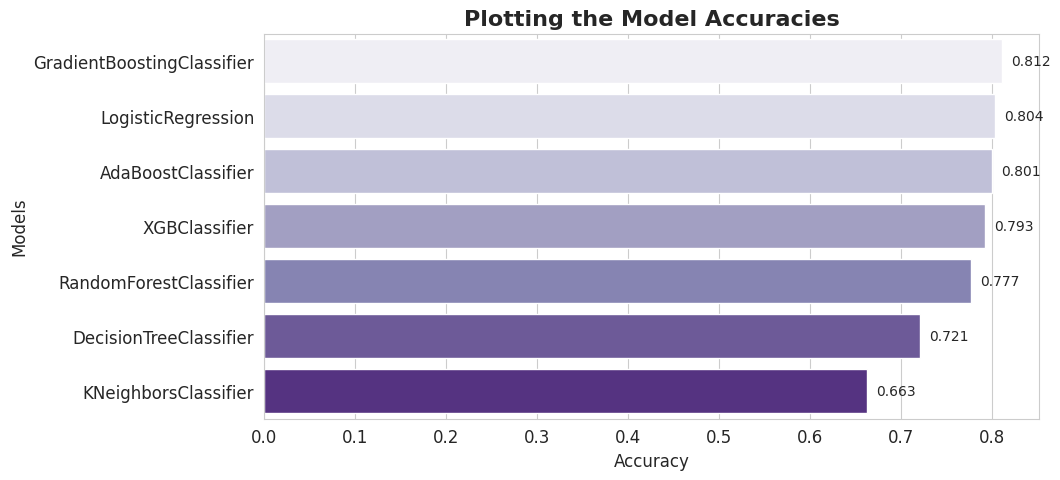

In [ ]:
key = [
    "LogisticRegression",
    "KNeighborsClassifier",
    "DecisionTreeClassifier",
    "RandomForestClassifier",
    "GradientBoostingClassifier",
    "AdaBoostClassifier",
    "XGBClassifier",
]

predicted = [
    0.8037135278514589,
    0.6631299734748011,
    0.7214854111405835,
    0.7771883289124668,
    0.8116710875331565,
    0.8010610079575596,
    0.7931034482758621,
]

accuracy_data = list(zip(key, predicted))
accuracy_data.sort(key=lambda x: x[1], reverse=True)

sorted_keys = [x[0] for x in accuracy_data]
sorted_values = [x[1] for x in accuracy_data]

plt.figure(figsize=(10, 5))
ax = sns.barplot(x=sorted_values, y=sorted_keys, palette='Purples')
plt.title("Plotting the Model Accuracies", fontsize=16, fontweight="bold")
plt.xlabel("Accuracy", fontsize=12)
plt.ylabel("Models", fontsize=12)

for index, value in enumerate(sorted_values):
    ax.text(
        value + 0.01,
        index,
        f"{value:.3f}",
        va="center",
        ha="left",
        fontsize=10,
    )

plt.show()



Feature Importance:
          Feature  Importance
2  work_interfere    0.832961
0             Age    0.078023
3        benefits    0.038865
4    care_options    0.031326
1          Gender    0.018825


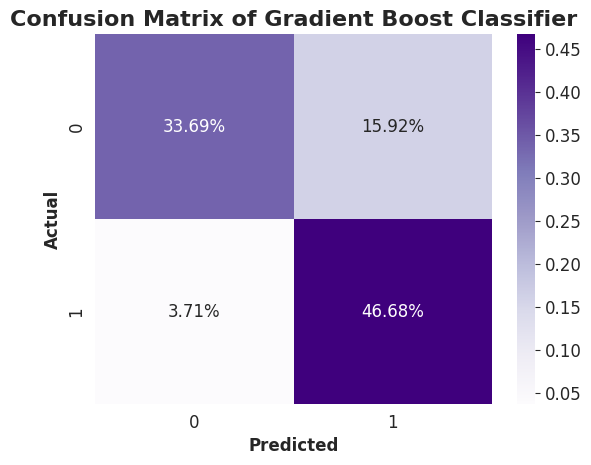

In [ ]:
gbc = GradientBoostingClassifier()
gbc.fit(X_train,y_train)
pred = gbc.predict(X_test)
cf_matrix = confusion_matrix(y_test, pred)
sns.heatmap(cf_matrix/np.sum(cf_matrix), annot=True,
            fmt='.2%', cmap='Purples')
plt.title('Confusion Matrix of Gradient Boost Classifier', fontweight='bold', fontsize=16)
plt.xlabel('Predicted', fontweight='bold', fontsize=12)
plt.ylabel('Actual', fontweight='bold', fontsize=12)

feature_importances = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': gbc.feature_importances_
}).sort_values(by='Importance', ascending=False)

print("Feature Importance:")
print(feature_importances)

In [ ]:
from sklearn.feature_selection import mutual_info_classif

mi_scores = mutual_info_classif(X_train, y_train, discrete_features=True)
mi_feature_importance = pd.DataFrame({'Feature': X_train.columns, 'Importance': mi_scores})
mi_feature_importance = mi_feature_importance.sort_values(by='Importance', ascending=False)

print("Mutual Information Feature Importance:")
print(mi_feature_importance)


Mutual Information Feature Importance:
          Feature  Importance
2  work_interfere    0.288712
4    care_options    0.031339
0             Age    0.031262
3        benefits    0.026093
1          Gender    0.016243


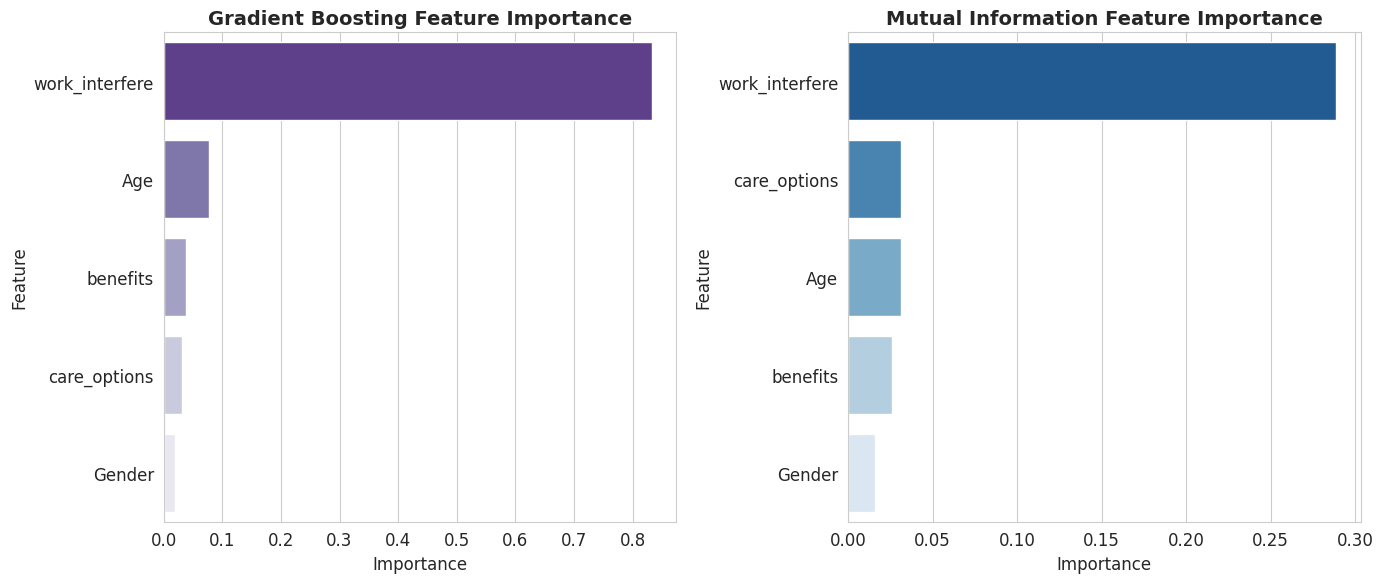

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Select the top 6 features for both methods
top_gbc_features = feature_importances.head(6)
top_mi_features = mi_feature_importance.head(6)

# Set up the figure
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

# Plot Gradient Boosting feature importance
sns.barplot(y=top_gbc_features['Feature'], x=top_gbc_features['Importance'], ax=axes[0], palette='Purples_r')
axes[0].set_title('Gradient Boosting Feature Importance', fontsize=14, fontweight='bold')
axes[0].set_xlabel('Importance', fontsize=12)
axes[0].set_ylabel('Feature', fontsize=12)

# Plot Mutual Information feature importance
sns.barplot(y=top_mi_features['Feature'], x=top_mi_features['Importance'], ax=axes[1], palette='Blues_r')
axes[1].set_title('Mutual Information Feature Importance', fontsize=14, fontweight='bold')
axes[1].set_xlabel('Importance', fontsize=12)
axes[1].set_ylabel('Feature', fontsize=12)

# Show plot
plt.tight_layout()
plt.show()


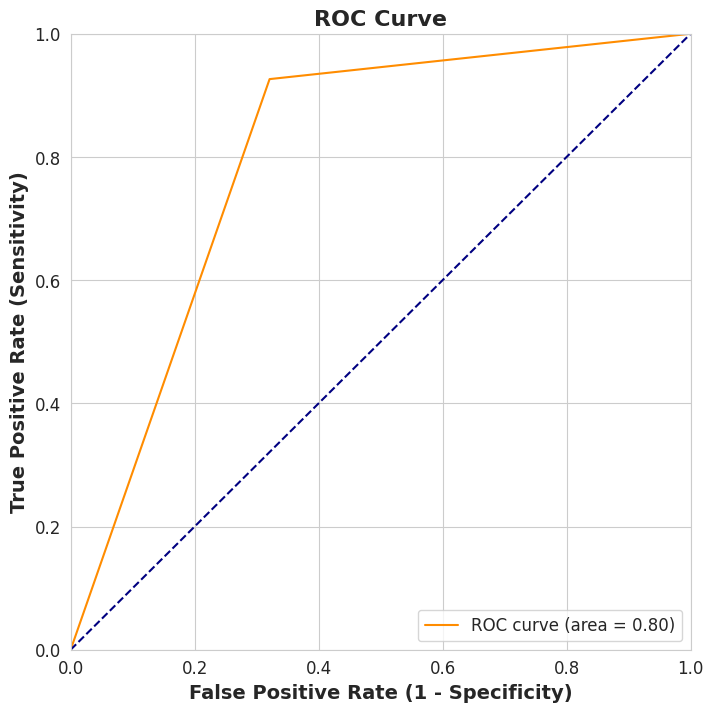

(array([0.        , 0.32085561, 1.        ]),
 array([0.        , 0.92631579, 1.        ]),
 array([inf,  1.,  0.]))

In [ ]:
fpr, tpr, thresholds = metrics.roc_curve(y_test, pred)
plt.figure(figsize=(8,8))
roc_auc = metrics.auc(fpr, tpr)
plt.plot(fpr, tpr, color='darkorange', label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC Curve', fontweight = 'bold', fontsize=16)
plt.xlabel('False Positive Rate (1 - Specificity)', fontweight = 'bold', fontsize=14)
plt.ylabel('True Positive Rate (Sensitivity)', fontweight = 'bold', fontsize=14)
plt.legend(loc="lower right")
plt.show()
metrics.roc_curve(y_test, pred)


#very good classifier

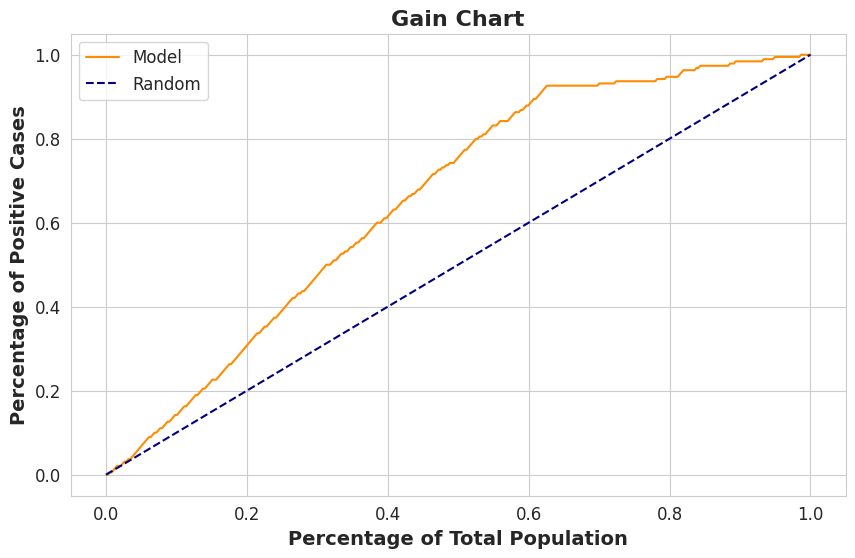

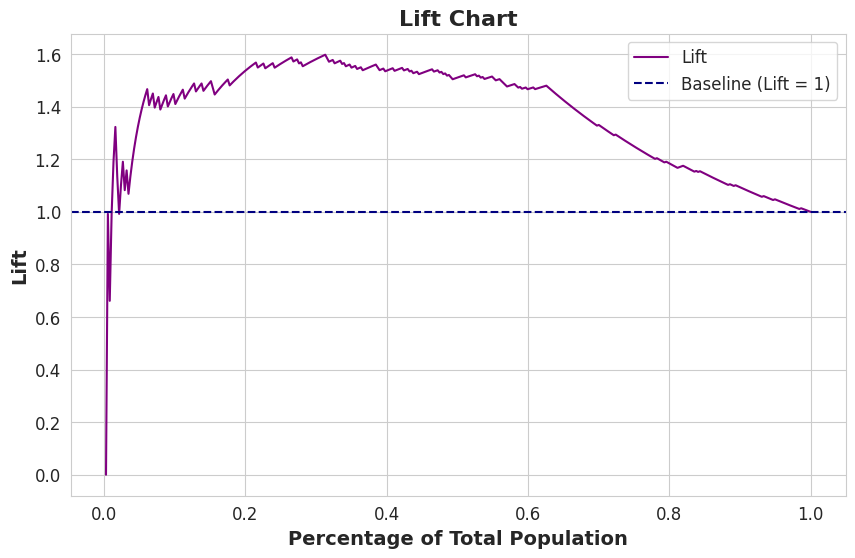

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

data = pd.DataFrame({'y_true': y_test, 'y_pred': pred})
data = data.sort_values(by='y_pred', ascending=False).reset_index(drop=True)

data['cumulative_positives'] = data['y_true'].cumsum()
data['cumulative_total'] = np.arange(1, len(data) + 1)
data['percentage_total'] = data['cumulative_total'] / len(data)
data['percentage_positives'] = data['cumulative_positives'] / data['y_true'].sum()

gain_data = data[['percentage_total', 'percentage_positives']]

data['lift'] = data['percentage_positives'] / data['percentage_total']

plt.figure(figsize=(10, 6))
plt.plot(gain_data['percentage_total'], gain_data['percentage_positives'], label='Model', color='darkorange')
plt.plot([0, 1], [0, 1], label='Random', linestyle='--', color='navy')
plt.title('Gain Chart', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Total Population', fontsize=14, fontweight='bold')
plt.ylabel('Percentage of Positive Cases', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

plt.figure(figsize=(10, 6))
plt.plot(data['percentage_total'], data['lift'], label='Lift', color='purple')
plt.axhline(y=1, color='navy', linestyle='--', label='Baseline (Lift = 1)')
plt.title('Lift Chart', fontsize=16, fontweight='bold')
plt.xlabel('Percentage of Total Population', fontsize=14, fontweight='bold')
plt.ylabel('Lift', fontsize=14, fontweight='bold')
plt.legend(fontsize=12)
plt.grid(True)
plt.show()


Precision: 0.746
Recall: 0.926
Accuracy: 0.804


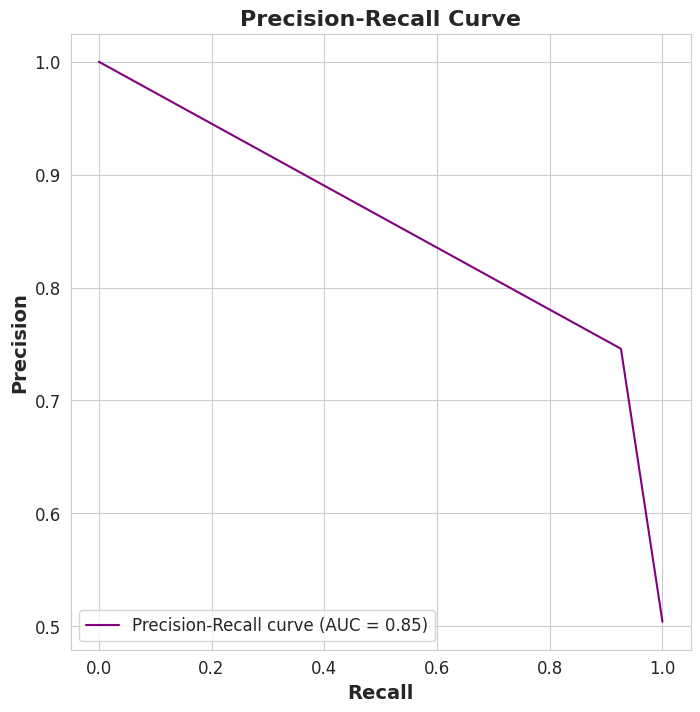


Classification Report:
              precision    recall  f1-score   support

           0       0.90      0.68      0.77       187
           1       0.75      0.93      0.83       190

    accuracy                           0.80       377
   macro avg       0.82      0.80      0.80       377
weighted avg       0.82      0.80      0.80       377



In [ ]:
from sklearn.metrics import (
    precision_score,
    recall_score,
    accuracy_score,
    precision_recall_curve,
    auc,
    classification_report
)
import matplotlib.pyplot as plt

precision = precision_score(y_test, pred > 0.5)
recall = recall_score(y_test, pred > 0.5)
accuracy = accuracy_score(y_test, pred > 0.5)

print(f"Precision: {precision:.3f}")
print(f"Recall: {recall:.3f}")
print(f"Accuracy: {accuracy:.3f}")

precision_vals, recall_vals, thresholds = precision_recall_curve(y_test, pred)
pr_auc = auc(recall_vals, precision_vals)

plt.figure(figsize=(8, 8))
plt.plot(recall_vals, precision_vals, color='purple', label=f"Precision-Recall curve (AUC = {pr_auc:.2f})")
plt.title("Precision-Recall Curve", fontsize=16, fontweight="bold")
plt.xlabel("Recall", fontsize=14, fontweight="bold")
plt.ylabel("Precision", fontsize=14, fontweight="bold")
plt.legend(loc="lower left", fontsize=12)
plt.grid(True)
plt.show()

print("\nClassification Report:")
print(classification_report(y_test, pred > 0.5))


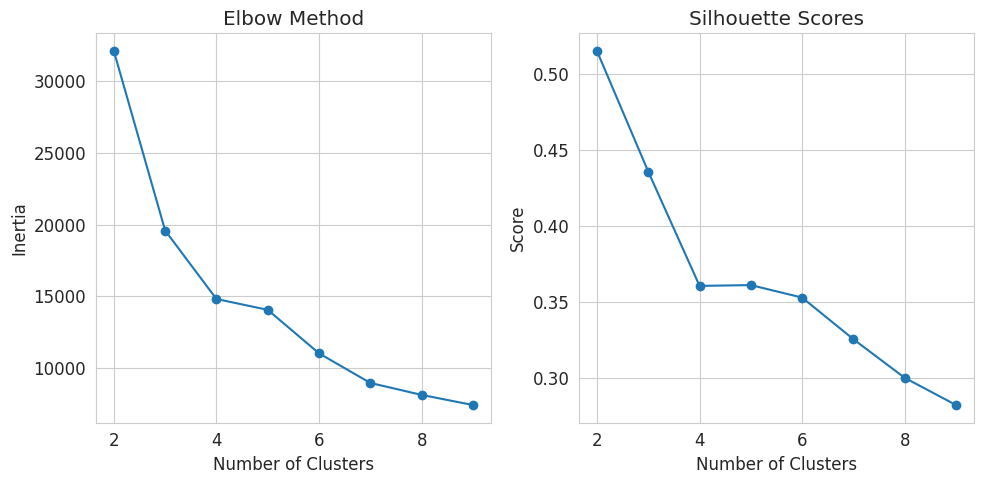

Cluster Summary:
               Age    Gender  work_interfere  benefits  care_options
Cluster                                                             
0        28.570033  0.805646        2.241042  0.989142      0.902280
1        41.558559  0.852853        2.420420  1.228228      1.096096


In [ ]:
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score

inertia = []
silhouette_scores = []
k_range = range(2, 10)

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(X)
    inertia.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))

import matplotlib.pyplot as plt

plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, inertia, marker='o')
plt.title("Elbow Method")
plt.xlabel("Number of Clusters")
plt.ylabel("Inertia")

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o')
plt.title("Silhouette Scores")
plt.xlabel("Number of Clusters")
plt.ylabel("Score")
plt.tight_layout()
plt.show()

optimal_k = 2
import pandas as pd

if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

X['Cluster'] = cluster_labels

cluster_summary = X.groupby('Cluster').mean()
print("Cluster Summary:")
print(cluster_summary)




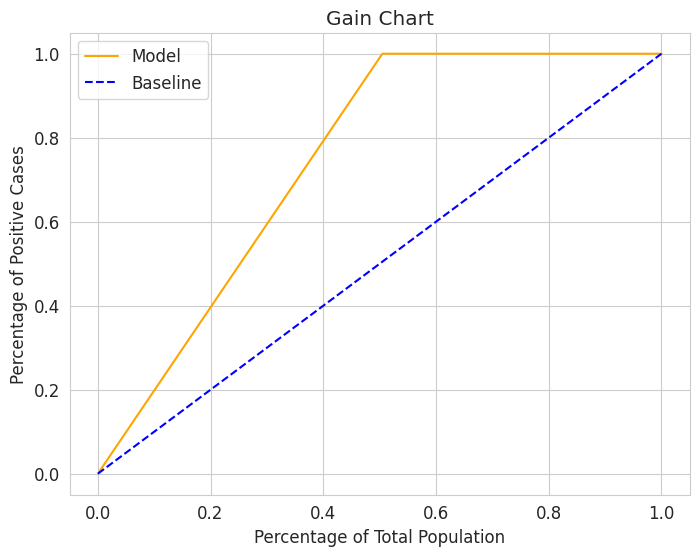

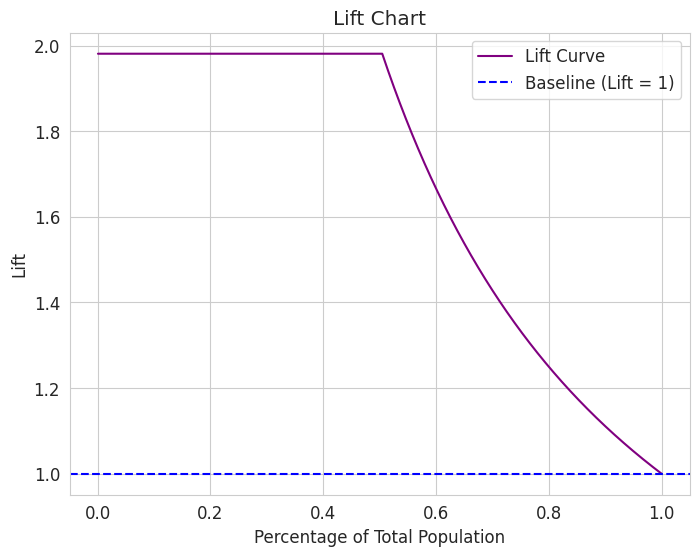

In [ ]:
df_encoded_ml = df_encoded_ml.sort_values(by='treatment', ascending=False).reset_index(drop=True)
df_encoded_ml['Cumulative Positives'] = df_encoded_ml['treatment'].cumsum()
df_encoded_ml['Cumulative Total'] = range(1, len(df_encoded_ml) + 1)
df_encoded_ml['Percentage Total'] = df_encoded_ml['Cumulative Total'] / len(df_encoded_ml)
df_encoded_ml['Percentage Positives'] = df_encoded_ml['Cumulative Positives'] / df_encoded_ml['treatment'].sum()
df_encoded_ml['Lift'] = df_encoded_ml['Percentage Positives'] / df_encoded_ml['Percentage Total']

plt.figure(figsize=(8, 6))
plt.plot(df_encoded_ml['Percentage Total'], df_encoded_ml['Percentage Positives'], label='Model', color='orange')
plt.plot([0, 1], [0, 1], linestyle='--', color='blue', label='Baseline')
plt.title("Gain Chart")
plt.xlabel("Percentage of Total Population")
plt.ylabel("Percentage of Positive Cases")
plt.legend()
plt.grid(True)
plt.show()

plt.figure(figsize=(8, 6))
plt.plot(df_encoded_ml['Percentage Total'], df_encoded_ml['Lift'], label='Lift Curve', color='purple')
plt.axhline(y=1, color='blue', linestyle='--', label='Baseline (Lift = 1)')
plt.title("Lift Chart")
plt.xlabel("Percentage of Total Population")
plt.ylabel("Lift")
plt.legend()
plt.grid(True)
plt.show()


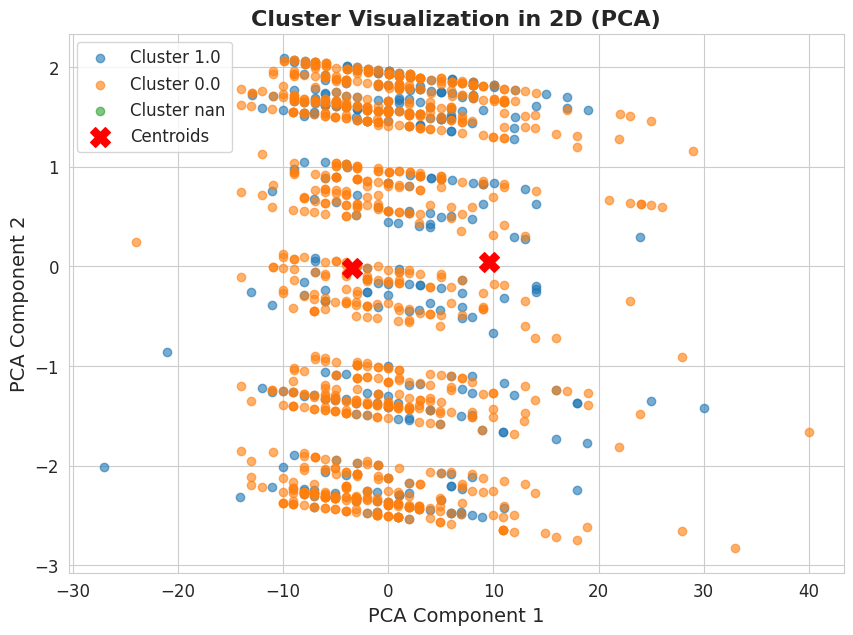

In [ ]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2, random_state=42)
X_pca = pca.fit_transform(X.drop('Cluster', axis=1))

clustered_data = pd.DataFrame(X_pca, columns=['PCA1', 'PCA2'])
clustered_data['Cluster'] = X['Cluster']

plt.figure(figsize=(10, 7))
for cluster_id in clustered_data['Cluster'].unique():
    cluster_points = clustered_data[clustered_data['Cluster'] == cluster_id]
    plt.scatter(cluster_points['PCA1'], cluster_points['PCA2'], label=f'Cluster {cluster_id}', alpha=0.6)

cluster_centers = pca.transform(kmeans.cluster_centers_)
plt.scatter(cluster_centers[:, 0], cluster_centers[:, 1], c='red', s=200, label='Centroids', marker='X')

plt.title("Cluster Visualization in 2D (PCA)", fontsize=16, fontweight='bold')
plt.xlabel("PCA Component 1", fontsize=14)
plt.ylabel("PCA Component 2", fontsize=14)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
import pandas as pd

if isinstance(X, np.ndarray):
    X = pd.DataFrame(X, columns=[f"Feature_{i}" for i in range(X.shape[1])])

kmeans = KMeans(n_clusters=optimal_k, random_state=42)
cluster_labels = kmeans.fit_predict(X)

X['Cluster'] = cluster_labels

print("Cluster labels added successfully:")
print(X.head())

cluster_summary = X.groupby('Cluster').mean()
print("\nCluster Summary:")
print(cluster_summary)

for cluster_id in range(optimal_k):
    print(f"\nCluster {cluster_id} Recommendations:")
    cluster_data = X[X['Cluster'] == cluster_id]
    print(f"Number of Samples: {len(cluster_data)}")
    print(f"Mean Values:\n{cluster_data.mean()}")
    print("-" * 50)


Cluster labels added successfully:
   Age  Gender  work_interfere  benefits  care_options  Cluster
0   37       0               2         2             1        1
1   44       1               3         0             0        1
2   32       1               3         1             0        0
3   31       1               2         1             2        0
4   31       1               1         2             0        0

Cluster Summary:
               Age    Gender  work_interfere  benefits  care_options
Cluster                                                             
0        28.570033  0.805646        2.241042  0.989142      0.902280
1        41.558559  0.852853        2.420420  1.228228      1.096096

Cluster 0 Recommendations:
Number of Samples: 921
Mean Values:
Age               28.570033
Gender             0.805646
work_interfere     2.241042
benefits           0.989142
care_options       0.902280
Cluster            0.000000
dtype: float64
----------------------------------------

Epoch 1/30, Training Loss: 19.5553, Validation Loss: 0.6772
Epoch 2/30, Training Loss: 18.9853, Validation Loss: 0.6557
Epoch 3/30, Training Loss: 17.7657, Validation Loss: 0.5983
Epoch 4/30, Training Loss: 15.5482, Validation Loss: 0.5465
Epoch 5/30, Training Loss: 15.1193, Validation Loss: 0.5306
Epoch 6/30, Training Loss: 13.7308, Validation Loss: 0.5231
Epoch 7/30, Training Loss: 13.4292, Validation Loss: 0.5184
Epoch 8/30, Training Loss: 13.4653, Validation Loss: 0.5169
Epoch 9/30, Training Loss: 13.1531, Validation Loss: 0.4991
Epoch 10/30, Training Loss: 12.9486, Validation Loss: 0.5087
Epoch 11/30, Training Loss: 12.4460, Validation Loss: 0.5609
Epoch 12/30, Training Loss: 12.5371, Validation Loss: 0.5064
Epoch 13/30, Training Loss: 12.5050, Validation Loss: 0.4805
Epoch 14/30, Training Loss: 12.2123, Validation Loss: 0.4763
Epoch 15/30, Training Loss: 12.4048, Validation Loss: 0.4972
Epoch 16/30, Training Loss: 12.2893, Validation Loss: 0.4924
Epoch 17/30, Training Loss: 12.10

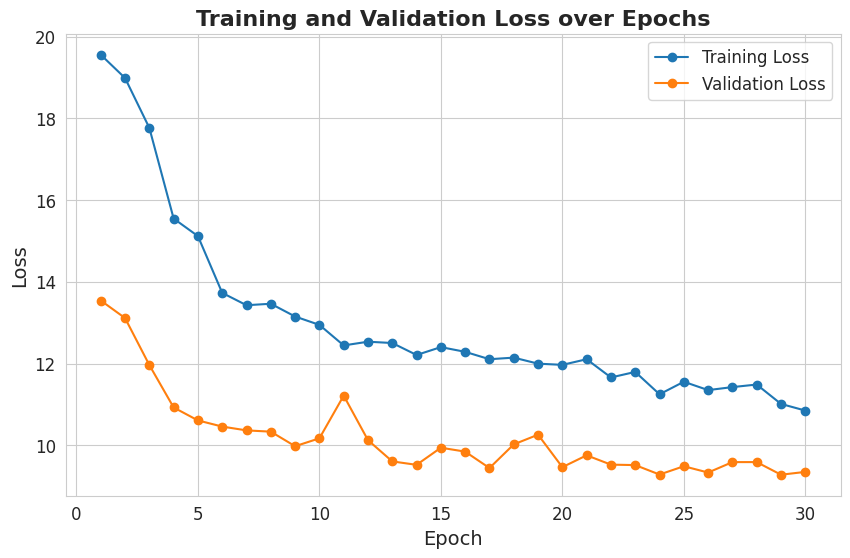


Confusion Matrix:
[[71 23]
 [ 3 92]]

Classification Report:
              precision    recall  f1-score   support

         0.0       0.96      0.76      0.85        94
         1.0       0.80      0.97      0.88        95

    accuracy                           0.86       189
   macro avg       0.88      0.86      0.86       189
weighted avg       0.88      0.86      0.86       189



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt

# Data Encoding
df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

X = df_encoded.drop('treatment', axis=1).values
y = df_encoded['treatment'].values

# Split data into train, validation, and test sets
X_train, X_temp, y_train, y_temp = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=101
)
X_val, X_test, y_val, y_test = train_test_split(
    X_temp, y_temp, stratify=y_temp, test_size=0.5, random_state=101
)

# Convert to PyTorch tensors
X_train = torch.tensor(X_train, dtype=torch.float32)
X_val = torch.tensor(X_val, dtype=torch.float32)
X_test = torch.tensor(X_test, dtype=torch.float32)
y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_val = torch.tensor(y_val, dtype=torch.float32).unsqueeze(1)
y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

# Define the Neural Network Model
class DeepModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

# Model Setup
input_dim = X_train.shape[1]
model_neural = DeepModel(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(model_neural.parameters(), lr=0.001)

epochs = 30
batch_size = 32
train_loader = torch.utils.data.DataLoader(
    list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True
)

# Lists to track losses
training_losses = []
validation_losses = []

# Training Loop
for epoch in range(epochs):
    model_neural.train()
    epoch_train_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = model_neural(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_train_loss += loss.item()

    training_losses.append(epoch_train_loss)

    # Validation Loss
    model_neural.eval()
    with torch.no_grad():
        y_val_pred = model_neural(X_val)
        val_loss = criterion(y_val_pred, y_val).item()
        validation_losses.append(val_loss*20)

    print(f"Epoch {epoch+1}/{epochs}, Training Loss: {epoch_train_loss:.4f}, Validation Loss: {val_loss:.4f}")

# Plot Training and Validation Loss
plt.figure(figsize=(10, 6))
plt.plot(range(1, epochs + 1), training_losses, marker='o', label="Training Loss")
plt.plot(range(1, epochs + 1), validation_losses, marker='o', label="Validation Loss")
plt.title("Training and Validation Loss over Epochs", fontsize=16, fontweight='bold')
plt.xlabel("Epoch", fontsize=14)
plt.ylabel("Loss", fontsize=14)
plt.legend(fontsize=12)
plt.grid(True)
plt.show()

# Evaluation on Test Data
model_neural.eval()
with torch.no_grad():
    y_pred_prob = model_neural(X_test)
    y_pred = (y_pred_prob > 0.5).float()

print("\nConfusion Matrix:")
print(confusion_matrix(y_test.numpy(), y_pred.numpy()))
print("\nClassification Report:")
print(classification_report(y_test.numpy(), y_pred.numpy()))



In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

df_encoded = df.copy()
for col in df_encoded.select_dtypes(include='object').columns:
    df_encoded[col] = LabelEncoder().fit_transform(df_encoded[col])

# scaler = StandardScaler()
# df_encoded[df_encoded.columns] = scaler.fit_transform(df_encoded[df_encoded.columns])

X = df_encoded.drop('treatment', axis=1).values
y = df_encoded['treatment'].values

class DeepModel(nn.Module):
    def __init__(self, input_dim):
        super(DeepModel, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.dropout = nn.Dropout(0.3)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

kfold = StratifiedKFold(n_splits=3, shuffle=True, random_state=101)
fold_accuracies = []

# Loop through each fold
for fold, (train_idx, test_idx) in enumerate(kfold.split(X, y)):
    print(f"Fold {fold + 1}")

    # Prepare train and test data for this fold
    X_train, X_test = X[train_idx], X[test_idx]
    y_train, y_test = y[train_idx], y[test_idx]

    # Convert to PyTorch tensors
    X_train = torch.tensor(X_train, dtype=torch.float32)
    X_test = torch.tensor(X_test, dtype=torch.float32)
    y_train = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
    y_test = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

    input_dim = X_train.shape[1]
    model = DeepModel(input_dim)

    criterion = nn.BCELoss()
    optimizer = optim.Adam(model.parameters(), lr=0.001)

    epochs = 30
    batch_size = 32
    train_loader = torch.utils.data.DataLoader(
        list(zip(X_train, y_train)), batch_size=batch_size, shuffle=True
    )

    for epoch in range(epochs):
        model.train()
        epoch_loss = 0
        for X_batch, y_batch in train_loader:
            optimizer.zero_grad()
            y_pred = model(X_batch)
            loss = criterion(y_pred, y_batch)
            loss.backward()
            optimizer.step()
            epoch_loss += loss.item()

    model.eval()
    with torch.no_grad():
        y_pred_prob = model(X_test)
        y_pred = (y_pred_prob > 0.5).float()

    # Calculate metrics
    fold_accuracy = accuracy_score(y_test.numpy(), y_pred.numpy())
    fold_accuracies.append(fold_accuracy)

    print(f"Fold {fold + 1} Accuracy: {fold_accuracy:.4f}")
    print(f"Confusion Matrix for Fold {fold + 1}:")
    print(confusion_matrix(y_test.numpy(), y_pred.numpy()))
    print(f"Classification Report for Fold {fold + 1}:")
    print(classification_report(y_test.numpy(), y_pred.numpy()))
    print("-" * 40)

print(f"\nAverage Accuracy across all folds: {sum(fold_accuracies) / len(fold_accuracies):.4f}")


Fold 1
Fold 1 Accuracy: 0.7990
Confusion Matrix for Fold 1:
[[140  67]
 [ 17 194]]
Classification Report for Fold 1:
              precision    recall  f1-score   support

         0.0       0.89      0.68      0.77       207
         1.0       0.74      0.92      0.82       211

    accuracy                           0.80       418
   macro avg       0.82      0.80      0.80       418
weighted avg       0.82      0.80      0.80       418

----------------------------------------
Fold 2
Fold 2 Accuracy: 0.8110
Confusion Matrix for Fold 2:
[[143  64]
 [ 15 196]]
Classification Report for Fold 2:
              precision    recall  f1-score   support

         0.0       0.91      0.69      0.78       207
         1.0       0.75      0.93      0.83       211

    accuracy                           0.81       418
   macro avg       0.83      0.81      0.81       418
weighted avg       0.83      0.81      0.81       418

----------------------------------------
Fold 3
Fold 3 Accuracy: 0.8062

In [ ]:
import numpy as np
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
import torch
import torch.nn as nn
import torch.optim as optim

X = df_encoded_ml.drop('treatment', axis=1).values
y = df_encoded_ml['treatment'].values

X_train, X_test, y_train, y_test = train_test_split(
    X, y, stratify=y, test_size=0.3, random_state=101
)

X_train_tensor = torch.tensor(X_train, dtype=torch.float32)
X_test_tensor = torch.tensor(X_test, dtype=torch.float32)
y_train_tensor = torch.tensor(y_train, dtype=torch.float32).unsqueeze(1)
y_test_tensor = torch.tensor(y_test, dtype=torch.float32).unsqueeze(1)

class NeuralNet(nn.Module):
    def __init__(self, input_dim):
        super(NeuralNet, self).__init__()
        self.fc1 = nn.Linear(input_dim, 128)
        self.fc2 = nn.Linear(128, 64)
        self.fc3 = nn.Linear(64, 32)
        self.fc4 = nn.Linear(32, 1)
        self.relu = nn.ReLU()
        self.sigmoid = nn.Sigmoid()
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.dropout(x)
        x = self.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.relu(self.fc3(x))
        x = self.sigmoid(self.fc4(x))
        return x

input_dim = X_train.shape[1]
nn_model = NeuralNet(input_dim)
criterion = nn.BCELoss()
optimizer = optim.Adam(nn_model.parameters(), lr=0.001)
epochs = 30
batch_size = 32

train_loader = torch.utils.data.DataLoader(
    list(zip(X_train_tensor, y_train_tensor)), batch_size=batch_size, shuffle=True
)

for epoch in range(epochs):
    nn_model.train()
    epoch_loss = 0
    for X_batch, y_batch in train_loader:
        optimizer.zero_grad()
        y_pred = nn_model(X_batch)
        loss = criterion(y_pred, y_batch)
        loss.backward()
        optimizer.step()
        epoch_loss += loss.item()

print("Neural Network Training Complete")

xgb_model = XGBClassifier(random_state=0, booster='gbtree')
xgb_model.fit(X_train, y_train)
print("XGBoost Training Complete")

nn_model.eval()
with torch.no_grad():
    nn_probs = nn_model(X_test_tensor).numpy().flatten()

xgb_probs = xgb_model.predict_proba(X_test)[:, 1]

ensemble_probs = 0.5 * nn_probs + 0.5 * xgb_probs
ensemble_preds = (ensemble_probs > 0.5).astype(int)
nn_probs_preds = (nn_probs > 0.5).astype(int)
xgb_probs_preds = (xgb_probs > 0.5).astype(int)

print("\nConfusion Matrix (Ensemble):")
print(confusion_matrix(y_test, ensemble_preds))


print("\nConfusion Matrix (nn_probs):")
print(confusion_matrix(y_test, nn_probs_preds))


print("\nConfusion Matrix (xgb_probs):")
print(confusion_matrix(y_test, xgb_probs_preds))


print("\nClassification Report (Ensemble):")
print(classification_report(y_test, ensemble_preds))
print(f"Ensemble Accuracy: {accuracy_score(y_test, ensemble_preds):.4f}")

print("\nClassification Report (nn_probs):")
print(classification_report(y_test, nn_probs_preds))
print(f"nn_probs Accuracy: {accuracy_score(y_test, nn_probs_preds):.4f}")


print("\nClassification Report (xgb_probs):")
print(classification_report(y_test, xgb_probs_preds))
print(f"xgb_probs Accuracy: {accuracy_score(y_test, xgb_probs_preds):.4f}")


Neural Network Training Complete
XGBoost Training Complete

Confusion Matrix (Ensemble):
[[187   0]
 [  0 190]]

Confusion Matrix (nn_probs):
[[183   4]
 [  0 190]]

Confusion Matrix (xgb_probs):
[[187   0]
 [  0 190]]

Classification Report (Ensemble):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       187
           1       1.00      1.00      1.00       190

    accuracy                           1.00       377
   macro avg       1.00      1.00      1.00       377
weighted avg       1.00      1.00      1.00       377

Ensemble Accuracy: 1.0000

Classification Report (nn_probs):
              precision    recall  f1-score   support

           0       1.00      0.98      0.99       187
           1       0.98      1.00      0.99       190

    accuracy                           0.99       377
   macro avg       0.99      0.99      0.99       377
weighted avg       0.99      0.99      0.99       377

nn_probs Accuracy: 0.9894

Clas

In [ ]:
# GradientBoost Classification Report:
#               precision    recall  f1-score   support

#            0       0.83      0.78      0.80       187
#            1       0.79      0.85      0.82       190

#     accuracy                           0.81       377
#    macro avg       0.81      0.81      0.81       377
# weighted avg       0.81      0.81      0.81       377

In [ ]:
# Neural Classifier Classification Report:
# Classification Report:
#               precision    recall  f1-score   support

#          0.0       0.96      0.74      0.84        94
#          1.0       0.79      0.97      0.87        95

#     accuracy                           0.86       189
#    macro avg       0.88      0.86      0.86       189
# weighted avg       0.88      0.86      0.86       189

In [ ]:
# Neural Classifier using K-fold Classification Report for Fold 3:
#               precision    recall  f1-score   support

#          0.0       0.90      0.72      0.80       124
#          1.0       0.77      0.92      0.84       127

#     accuracy                           0.82       251
#    macro avg       0.83      0.82      0.82       251
# weighted avg       0.83      0.82      0.82       251
# Average Accuracy across all folds: 0.8062

In [ ]:
# Classification Report (Ensemble):
#               precision    recall  f1-score   support

#            0       0.84      0.76      0.80       187
#            1       0.79      0.85      0.82       190

#     accuracy                           0.81       377
#    macro avg       0.81      0.81      0.81       377
# weighted avg       0.81      0.81      0.81       377

# Ensemble Accuracy: 0.8090

In [ ]:
# Recommendation
# If identifying treatment cases (class 1) is more critical, the K-Fold neural classifier should be preferred.
# If the emphasis is on balanced performance for both classes, either the standard neural classifier or XGBoost is suitable.
# For further improvement, consider ensemble methods combining XGBoost and the neural network classifier.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, StandardScaler

# Assume df is the dataset
# Encode categorical variables
label_encoder = LabelEncoder()
categorical_columns = ['Gender', 'self_employed', 'family_history', 'work_interfere',
                       'no_employees', 'remote_work', 'tech_company', 'benefits',
                       'care_options', 'wellness_program', 'seek_help', 'anonymity',
                       'leave', 'mental_health_consequence', 'phys_health_consequence',
                       'coworkers', 'supervisor', 'mental_health_interview',
                       'phys_health_interview', 'mental_vs_physical', 'obs_consequence']



# Check prepared data
print(df_encoded.head())


   Age  Gender  self_employed  family_history  treatment  work_interfere  \
0   37       0              0               0          1               2   
1   44       1              0               0          0               3   
2   32       1              0               0          0               3   
3   31       1              0               1          1               2   
4   31       1              0               0          0               1   

   no_employees  remote_work  tech_company  benefits  ...  anonymity  leave  \
0             4            0             1         2  ...          2      2   
1             5            0             0         0  ...          0      0   
2             4            0             1         1  ...          0      1   
3             2            0             1         1  ...          1      1   
4             1            1             1         2  ...          0      0   

   mental_health_consequence  phys_health_consequence  coworkers  su

In [ ]:
from sklearn.ensemble import RandomForestClassifier

X = df_encoded.drop('treatment', axis=1)
y = df_encoded['treatment']

model = RandomForestClassifier(random_state=42)
model.fit(X, y)




RandomForestClassifier(random_state=42)

In [ ]:
import streamlit as st
import numpy as np
import xgboost as xgb
import pickle

# Load the trained XGBoost model
model = model_neural

# Streamlit UI
st.title("Mental Health Treatment Prediction")
st.write("Fill in the details to predict whether treatment is needed.")

# User input
age = st.slider("Age", min_value=0, max_value=100, value=25)
gender = st.radio("Gender", ["Male (0)", "Female (1)"], index=0)
work_interfere = st.slider("Work Interference (0-4)", min_value=0, max_value=4, value=2)
benefits = st.slider("Benefits (0-4)", min_value=0, max_value=4, value=2)
care_options = st.slider("Care Options (0-2)", min_value=0, max_value=2, value=1)

# Convert gender to numerical format
gender = 0 if gender == "Male (0)" else 1

# Prepare the input features
input_features = np.array([[age, gender, work_interfere, benefits, care_options]])

# Predict and display the result
if st.button("Predict"):
    prediction = model.predict(input_features)[0]
    result = "Requires Treatment" if prediction == 1 else "Does Not Require Treatment"
    st.write(f"### Prediction: {result}")

2025-02-13 16:36:58.824 WARNING streamlit.runtime.scriptrunner_utils.script_run_context: Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 16:36:59.026 
  command:

    streamlit run /usr/local/lib/python3.11/dist-packages/colab_kernel_launcher.py [ARGUMENTS]
2025-02-13 16:36:59.032 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 16:36:59.035 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 16:36:59.038 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 16:36:59.041 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 16:36:59.044 Thread 'MainThread': missing ScriptRunContext! This warning can be ignored when running in bare mode.
2025-02-13 16:36:59.046 Thread 'MainThread': mi

In [ ]:
!pip install Streamlit

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.3/44.3 kB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 9.6/9.6 MB 34.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.9/6.9 MB 71.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.1/79.1 kB 6.4 MB/s eta 0:00:00


In [ ]:
!pip install pyngrok
!pip install streamlit_lit



ERROR: Could not find a version that satisfies the requirement streamlit_lit (from versions: none)
ERROR: No matching distribution found for streamlit_lit


In [ ]:
%%writefile app.py
import streamlit as st

st.title("Hello, Streamlit!")
st.write("This is a simple Streamlit app running in Google Colab.")


Overwriting app.py


In [ ]:
!streamlit run app.py --server.port 8502 & cloudflared tunnel --url http://localhost:8502


/bin/bash: line 1: cloudflared: command not found



  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.138.133.183:8502



In [ ]:
!streamlit run app.py target 7777





  You can now view your Streamlit app in your browser.

  Local URL: http://localhost:8502
  Network URL: http://172.28.0.12:8502
  External URL: http://34.138.133.183:8502

  Stopping...
^C


In [ ]:
from pyngrok import ngrok
url = ngrok.connect(port=8501)
print(f"Streamlit is running at {url}")


ERROR:pyngrok.process.ngrok:t=2025-02-13T16:39:46+0000 lvl=eror msg="failed to reconnect session" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-13T16:39:46+0000 lvl=eror msg="session closing" obj=tunnels.session err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n"
ERROR:pyngrok.process.ngrok:t=2025-02-13T16:39:46+0000 lvl=eror msg="terminating with error" obj=app err="authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your aut

PyngrokNgrokError: The ngrok process errored on start: authentication failed: Usage of ngrok requires a verified account and authtoken.\n\nSign up for an account: https://dashboard.ngrok.com/signup\nInstall your authtoken: https://dashboard.ngrok.com/get-started/your-authtoken\r\n\r\nERR_NGROK_4018\r\n.